In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
## This can be erased if running from a Conda environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Make sure to change the file path according to your directory structure!
file_path = '/content/drive/My Drive/440_Project/pMHC_TNBC_all_samples.xls'
excel_file = pd.ExcelFile(file_path)

#TNBC Samples with lymph node spread
N_spread_labels = ['Sample_333','Sample_2339','Sample_977','Sample_825','Sample_2060','Sample_1097','Sample_1949']

#TNBC Samples with no lymph node spread (2189, 513, 1478, 1137, 2049)
NLN_spread_labels = ['Sample_2189','Sample_513','Sample_1478','Sample_1137','Sample_2049']

# Dict to store dataframes
dfs_dict = {}

# Iterate through each sheet in the Excel file
# Read the specific columns corresponding to data of interest: intensity, binding affinity to patient-specific HLA alleles,
# and ion score and q-value measures of confidence

for sheet_name in excel_file.sheet_names:
    df = pd.read_excel(excel_file, sheet_name=sheet_name, usecols=[1,6,15,16,20,26,27,28,29,30,31,32,33])

    # Add the dataframe to the dictionary with the sheet name as the key
    dfs_dict[sheet_name] = df

In [4]:
dfs_dict['Sample_333'].head()

,Peptide sequence,Total ion current,Score,q-value,Protein accessions / positions,NetMHCpan-4.1b affinity: HLA-A*02:01,NetMHCpan-4.1b affinity: HLA-A*33:03,NetMHCpan-4.1b affinity: HLA-B*40:01,NetMHCpan-4.1b affinity: HLA-B*58:01,NetMHCpan-4.1b affinity: HLA-C*03:02,NetMHCpan-4.1b affinity: HLA-C*03:04,NetMHCpan-4.1b rank: HLA-A*02:01,NetMHCpan-4.1b rank: HLA-A*33:03
0,AAAAAAAAL,686000.0,20.09,0.000092,breast_333_18t-PP_24862_ENSG00000106799_ENST00...,4776.97,28868.98,6080.24,5345.51,27.41,5.43,9.304,33.674
1,AAAAAGASL,422000.0,20.13,0.000092,"310_ConcatSP[9148,9156]",9905.52,31115.82,7412.40,4970.26,28.74,5.53,14.626,39.368
2,AAAAPSPVL,620000.0,12.61,0.002500,breast_333_18t-PP_15244_ENSG00000145687_ENST00...,9680.48,35749.82,7088.70,3207.42,26.28,5.63,14.403,54.578
3,AAAAVGGAL,854000.0,22.12,0.000000,breast_333_18t-PP_36460_ENSG00000119632_ENST00...,12713.87,30912.80,7833.85,11023.20,43.89,11.53,17.563,38.806
4,AAAAVGPAM,191000.0,21.74,0.000000,breast_333_18t-PP_53682_ENSG00000100325_ENST00...,9605.04,27384.52,8502.32,3566.50,7.40,5.19,14.327,30.343


In [5]:
'''
extract_ensg_value() is a parsing function meant to take a string consisting of a combination of several gene identifier types
,search for the ENSG identifier and return the first match.

source_protein : string consisting of a combination of several gene identifier types

'''
def extract_ensg_value(source_protein):
    if isinstance(source_protein, str):
      match = re.search(r'ENSG[0-9]+',source_protein)  # Pattern to match "ENSG..._"
      if match:
          return match.group(0)  # Return the first match
    return None  # No match found

# Apply the extraction function to the 'Source Protein' column for every dataframe in our dataset
# This will modify our original dataframe and also remove all rows that don't have an ENSG identifier
# We print out the number of rows removed at the end

for sheet_name, df in dfs_dict.items():
    rows_before = len(df)

    df['Protein accessions / positions'] = df['Protein accessions / positions'].apply(extract_ensg_value)

    # Remove rows where 'Source Protein' is None (i.e., no match found)
    df = df.dropna(subset=['Protein accessions / positions'])

    # Store the updated dataframe back into the dictionary
    dfs_dict[sheet_name] = df
    rows_after = len(df)

    rows_removed = rows_before - rows_after
    print(f"Sheet '{sheet_name}' - {rows_removed} rows removed.")

Sheet 'Sample_231' - 2 rows removed.
Sheet 'Sample_333' - 20 rows removed.
Sheet 'Sample_344' - 17 rows removed.
Sheet 'Sample_346' - 29 rows removed.
Sheet 'Sample_513' - 15 rows removed.
Sheet 'Sample_684' - 11 rows removed.
Sheet 'Sample_790' - 65 rows removed.
Sheet 'Sample_820' - 56 rows removed.
Sheet 'Sample_825' - 152 rows removed.
Sheet 'Sample_928' - 8 rows removed.
Sheet 'Sample_977' - 124 rows removed.
Sheet 'Sample_1029' - 52 rows removed.
Sheet 'Sample_1097' - 129 rows removed.
Sheet 'Sample_1137' - 7 rows removed.
Sheet 'Sample_1160' - 128 rows removed.
Sheet 'Sample_1192' - 10 rows removed.
Sheet 'Sample_1208' - 131 rows removed.
Sheet 'Sample_1305' - 3 rows removed.
Sheet 'Sample_1478' - 9 rows removed.
Sheet 'Sample_1945' - 28 rows removed.
Sheet 'Sample_1949' - 15 rows removed.
Sheet 'Sample_2049' - 21 rows removed.
Sheet 'Sample_2060' - 51 rows removed.
Sheet 'Sample_2179' - 46 rows removed.
Sheet 'Sample_2189' - 42 rows removed.
Sheet 'Sample_2339' - 1 rows removed

In [7]:
# Save all of the dataframes in the dictionary as separate csv files:
for sheet_name, df in dfs_dict.items():
    df.to_csv(f'{sheet_name}.csv', index=False)
    print(f"Saved {sheet_name}.csv")
output_file = 'peptide_filteredd_ddata_all_samples.xlsx'

# Use ExcelWriter to save the dictionary of dataframes to an Excel file
with pd.ExcelWriter(output_file) as writer:
    for sheet_name, df in dfs_dict.items():
        # Write each dataframe to a sheet with the corresponding sheet name
        df.to_excel(writer, sheet_name=sheet_name)

print(f"Dataframes saved successfully to {output_file}")


## This peptide_filtered_data_all_samples.xlsx file will contain only peptides that have been matched to a
## source protein across all patient samples which we will use for all subsequent analysis
##
## At this stage, using https://www.biotools.fr/human/ensembl_symbol_converter, we manually converted all of the Ensembl (ENSG) codes
## and added them to the peptide_filtered_data_all_samples.xlsx file to make peptide_filtered_data_all_samples_2.xlsx
##


Saved Sample_231.csv
Saved Sample_333.csv
Saved Sample_344.csv
Saved Sample_346.csv
Saved Sample_513.csv
Saved Sample_684.csv
Saved Sample_790.csv
Saved Sample_820.csv
Saved Sample_825.csv
Saved Sample_928.csv
Saved Sample_977.csv
Saved Sample_1029.csv
Saved Sample_1097.csv
Saved Sample_1137.csv
Saved Sample_1160.csv
Saved Sample_1192.csv
Saved Sample_1208.csv
Saved Sample_1305.csv
Saved Sample_1478.csv
Saved Sample_1945.csv
Saved Sample_1949.csv
Saved Sample_2049.csv
Saved Sample_2060.csv
Saved Sample_2179.csv
Saved Sample_2189.csv
Saved Sample_2339.csv
Dataframes saved successfully to peptide_filteredd_ddata_all_samples.xlsx


In [ ]:
## We read the new file once again, and save all of the dataframes to the dictionary 'all_samples'
## Make sure to change the file path according to your directory structure!!

file_path = '/content/drive/My Drive/440_Project/peptide_filtered_data_all_samples_2.xlsx'
excel_file = pd.ExcelFile(file_path)

#TNBC Samples with lymph node spread
N_spread_labels = ['Sample_333','Sample_2339','Sample_977','Sample_825','Sample_2060','Sample_1097','Sample_1949']

#TNBC Samples with no lymph node spread (2189, 513, 1478, 1137, 2049)
NLN_spread_labels = ['Sample_2189','Sample_513','Sample_1478','Sample_1137','Sample_2049']

# Dict to store dataframes
all_samples = {}

# Iterate through each sheet in the Excel file
for sheet_name in excel_file.sheet_names:
    # Read the specific columns
    df = pd.read_excel(excel_file, sheet_name=sheet_name)

    # Add the dataframe to the dictionary with the sheet name as the key
    all_samples[sheet_name] = df

## Noticed that the last column name in this sample must be changed to 'Source Protein'
all_samples['Sample_1137'].rename(columns={'Unnamed: 14': 'Source Protein'}, inplace=True)

In [ ]:
## Determine which out of the 20+ samples are the TNBC samples we are interested in
all_relevant_samples = N_spread_labels + NLN_spread_labels

#Save protein counts to dataframe:
protein_counts_list = []

# Iterate over each sample and count the number of peptides that are derived from the same source protein
for label in all_relevant_samples:
  # Count number of peptides per source protein
  protein_counts = all_samples[label].groupby('Source Protein')['Peptide sequence'].count().reset_index()

  # Rename the column for clarity
  protein_counts = protein_counts.rename(columns={'Peptide sequence': 'Peptide count'})
  protein_counts['Sample'] = label

  # Sort descending to get most represented proteins
  top_proteins = protein_counts.sort_values(by='Peptide count', ascending=False)
  protein_counts_list.append(protein_counts)

  # Show top N proteins (50 in this case) for every sample
  print(label)
  print(top_proteins.head(50))

protein_counts_df = pd.concat(protein_counts_list, ignore_index=True)


pivot_df = protein_counts_df.pivot_table(
    index='Source Protein',
    columns='Sample',
    values='Peptide count',
    fill_value=0
)


Sample_333
     Source Protein  Peptide count      Sample
386          COL6A3             51  Sample_333
2196            VIM             30  Sample_333
1440           PLEC             22  Sample_333
55            AHNAK             17  Sample_333
1714          RRBP1             15  Sample_333
1207           MYH9             14  Sample_333
2028           TLN1             13  Sample_333
724             FN1             12  Sample_333
836           HDLBP             12  Sample_333
1087          MACF1             11  Sample_333
1901         SPTAN1             11  Sample_333
385          COL6A2             10  Sample_333
362            CLTC             10  Sample_333
25            ACTG1             10  Sample_333
866           HLA-E              9  Sample_333
1696           RPN2              9  Sample_333
898        HSP90AB1              9  Sample_333
431          CTNNA1              9  Sample_333
563         DYNC1H1              9  Sample_333
605          EIF4G1              8  Sample_333
18

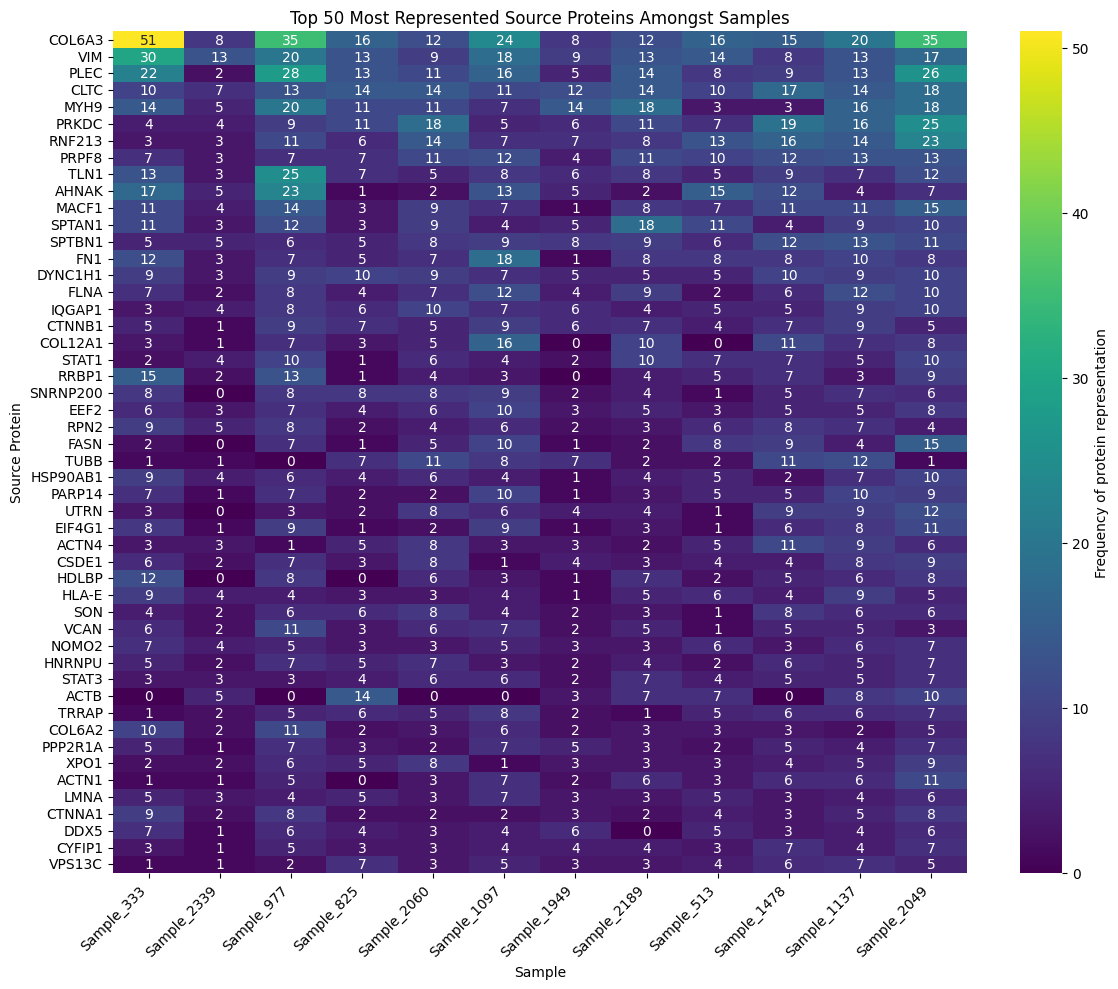

In [ ]:
## This code block will plot the top N represented proteins across all samples and can show whether
## there is any difference in protein representation across the set of peptides that are reported for these TNBC tumor samples

heatmap_data = pivot_df.copy()

# Reorder columns
heatmap_data = heatmap_data[all_relevant_samples]

# Optionally filter to top N proteins overall
top_proteins = heatmap_data.sum(axis=1).sort_values(ascending=False).head(50).index
heatmap_data = heatmap_data.loc[top_proteins]

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".0f", cbar_kws={'label': 'Frequency of protein representation'})
plt.title("Top 50 Most Represented Source Proteins Amongst Samples")
plt.ylabel("Source Protein")
plt.xlabel("Sample")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
